# Project Overview

The goal of the project is to build a deep-learning model that is able to detect potholes.

## The Dataset

The pothole dataset contains 665 images annotated with bounding boxes around potholes.The annotations are in XML format(similar to Pascal VOC). There is a splits.json file in which training-test sets are defined.

# 1. Task 1

- Understand the data structure
- Visualize the images

In [1]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
IMG_SIZE = 256
TRAIN_DIR = './Potholes/annotated-images/train'
TEST_DIR = './Potholes/annotated-images/test'

In [ ]:
def parse_annotation(img_folder):
    tree = ET.parse(f'{TRAIN_DIR}/{img_folder}/ground_truth.xml')
    root = tree.getroot()
    boxes = []

    for obj in root.iter('object'):
        bbox = obj.find('bndbox')
        box = {
            'class': obj.find('name').text,
            'xmin': int(bbox.find('xmin').text),
            'ymin': int(bbox.find('ymin').text),
            'xmax': int(bbox.find('xmax').text),
            'ymax': int(bbox.find('ymax').text),
        }
        boxes.append(box)

    return boxes

In [ ]:
def visualize_image(image_path, boxes, ax):
    image = Image.open(image_path)
    ax.imshow(image)

    for box in boxes:
        xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 5, box['class'], fontsize=12, color='red', weight='bold')

    ax.axis('off')

In [ ]:
def visualize_dataset(num_images=6, rows=2, cols=3):
    img_folders = os.listdir(TRAIN_DIR) 
    img_folders.sort() 

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    fig.text(0.5, 0.02, "Annotated Pothole Images", ha='center', fontsize=16)

    axes = axes.flatten()

    for i in range(num_images):
        img_folder = img_folders[i]
        image_path = f'{TRAIN_DIR}/{img_folder}/original.jpg'

        boxes = parse_annotation(img_folder)
        visualize_image(image_path, boxes, axes[i])
        axes[i].set_title(f"{img_folder}", fontsize=10)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

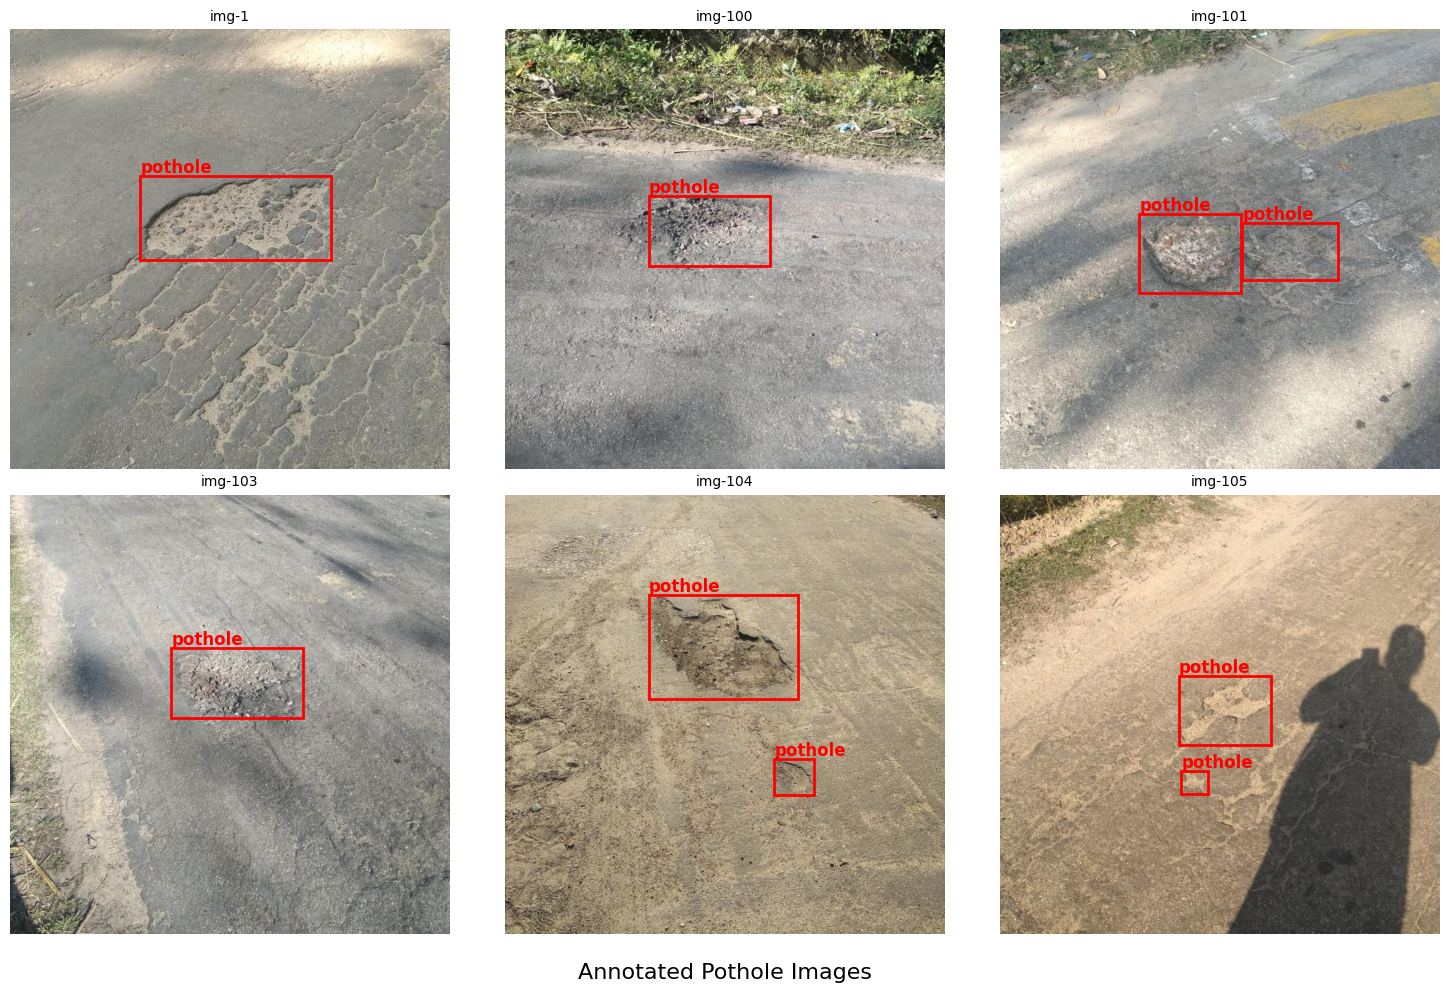

In [99]:
visualize_dataset(num_images=6, rows=2, cols=3)

In [100]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [101]:
def get_unique_image_sizes_and_ratios(images_dir):
    size_counts = {}
    aspect_ratios = set()
    for image_file in os.listdir(images_dir):
        image_path = f'{images_dir}/{image_file}/original.jpg'
        with Image.open(image_path) as img:
            width, height = img.size
            size = (width, height)

            if height != 0:
                ratio = width / height
                aspect_ratios.add(round(ratio, 4))  # Rounded for readability
            else:
                print(f"Warning: Image {image_file} has zero height.")
                ratio = None

            if size in size_counts:
                size_counts[size] += 1
            else:
                size_counts[size] = 1
                
    return size_counts, aspect_ratios

In [ ]:
def count_annotations(images_path):
    total_annotations = 0
    objects_per_image = {}

    for image_path in os.listdir(images_path):
        xml_path = f'{images_path}/{image_path}/ground_truth.xml'
        tree = ET.parse(xml_path)
        root = tree.getroot()
        num_objects = len(root.findall('object'))
        total_annotations += num_objects
        
        image_filename = os.path.splitext(image_path)[0]
        objects_per_image[image_filename] = num_objects

    return total_annotations, objects_per_image

In [103]:
def find_images_with_max_objects(objects_per_image):
    max_objects = max(objects_per_image.values())
    images_with_max = [filename for filename, count in objects_per_image.items() if count == max_objects]

    return max_objects, images_with_max

In [ ]:
def visualize_image_with_annotations(image_filename):
    image_path = f'{TRAIN_DIR}/{image_filename}/original.jpg' 

    # Load the image
    image = cv2.imread(image_path)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Parse annotations to get bounding boxes
    annotation_file = f'{TRAIN_DIR}/{image_filename}/ground_truth.xml'
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    boxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        boxes.append((xmin, ymin, xmax, ymax))

    # Plot the image
    fig, ax = plt.subplots(1, figsize=(6, 6))
    ax.imshow(image_rgb)
    ax.set_title(f"Image: {image_filename} | Potholes: {len(boxes)}")
    ax.axis('off')

    for box in boxes:
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), width=xmax-xmin, height=ymax-ymin, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.show()

Total number of images: 532

Number of unique image sizes: 101

Number of unique image aspect ratios: 100

Total number of pothole annotations: 1441

Maximum number of objects in an image: 19
Minimum number of objects in an image: 1

Image(s) with the maximum number of potholes (19):
- img-595.jpg


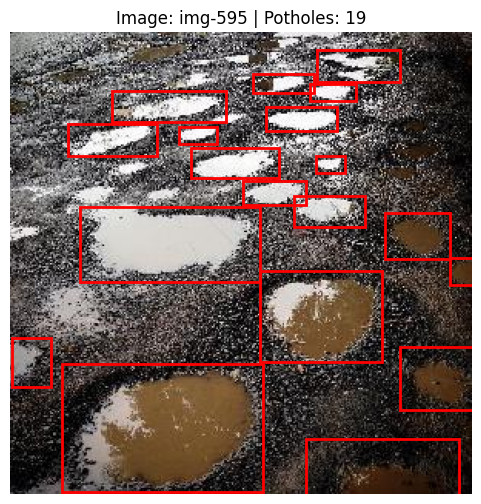

In [105]:
images_directory = TRAIN_DIR

# Count total images
image_files = os.listdir(images_directory)
total_images = len(image_files)
print(f"Total number of images: {total_images}")

# Get unique image sizes and aspect ratios
unique_sizes, aspect_ratios = get_unique_image_sizes_and_ratios(images_directory)
num_unique_sizes = len(unique_sizes)
num_unique_ratios = len(aspect_ratios)

print(f"\nNumber of unique image sizes: {num_unique_sizes}")
print(f"\nNumber of unique image aspect ratios: {num_unique_ratios}")

# Count total annotations and track objects per image
total_annotations, objects_per_image = count_annotations(images_directory)
print(f"\nTotal number of pothole annotations: {total_annotations}")

max_objects, images_with_max = find_images_with_max_objects(objects_per_image)
min_objects = min(objects_per_image.values())
print(f"\nMaximum number of objects in an image: {max_objects}")
print(f"Minimum number of objects in an image: {min_objects}")

print(f"\nImage(s) with the maximum number of potholes ({max_objects}):")
for image_name in images_with_max:
    print(f"- {image_name}.jpg")
    visualize_image_with_annotations(image_name)

# 2. Task2: Extract Object proposals for all the images

The goal is to generate candidate regions in each image that may contain potholes using object proposal algorithms.

**What are object proposals?**
Regions in an image that are likely to contain objects of interest. They allow to reduce the search space for the object detection models by focusing on promising areas.

Some moethods:

**Selective Search(SS):**
- It groups pixels based on color, texture, size and shape compatibility. Hierarchical grouping leads to region proposals.

**Edge Boxes:**
- Score boxes based on the number of enclosed eedges. It is faster than SS and generates high-quality proposals

How to extract the proposals?

1. Resize the images to spped up the process(specially with SS it is neccessary)
2. Implementation of the algorithm
3. Iterate over the dataset and aply the algo
4. Save the proposals as numpy arrays

In [106]:
import cv2

def extract_selective_search(image):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    return rects

In [107]:
import json
from tqdm import tqdm

def process_images():
    for image_file in tqdm(os.listdir(TRAIN_DIR), desc='Processing images'):
        image = cv2.imread(f'{TRAIN_DIR}/{image_file}/original.jpg') 
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        rects = extract_selective_search(image)
        rects = [{
            'class': '',
            'xmin': int(rect[0]),
            'ymin': int(rect[1]),
            'xmax': int(rect[2]),
            'ymax': int(rect[3]),
        } for rect in rects]
    
        with open(f'{TRAIN_DIR}/{image_file}/selective_search.json', 'w') as f:  
            json.dump(rects, f, indent=4)

In [108]:
process_images()

Processing images:   1%|▏         | 7/532 [00:02<02:54,  3.01it/s]


KeyboardInterrupt: 

In [ ]:
def draw_bounding_boxes(image, boxes, color=(0, 255, 0), thickness=2):
    for box in boxes:
        xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, thickness)

    return image

In [ ]:
def visualize_top_proposals(image_idx, alg, top_n, save):
    image = cv2.imread(f'{TRAIN_DIR}/img-{image_idx}/original.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

    proposals = json.load(open(f'{TRAIN_DIR}/img-{image_idx}/{alg}.json', 'r')),
    top_proposals = proposals[0][:top_n]

    image_with_boxes = image.copy()
    image_with_boxes = draw_bounding_boxes(image_with_boxes, top_proposals, color=(255, 0, 0), thickness=1)

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_with_boxes)
    if alg=='ss':
        plt.title(f"Top {top_n} Selective Search Proposals")
    elif alg=="eb":
        plt.title(f"Top {top_n} EdgeBoxes Proposals")
        
    plt.axis('off')
    plt.show()

    if save:
        image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{TRAIN_DIR}/img-{image_idx}/{alg}_top_{top_n}.jpg', image_with_boxes)

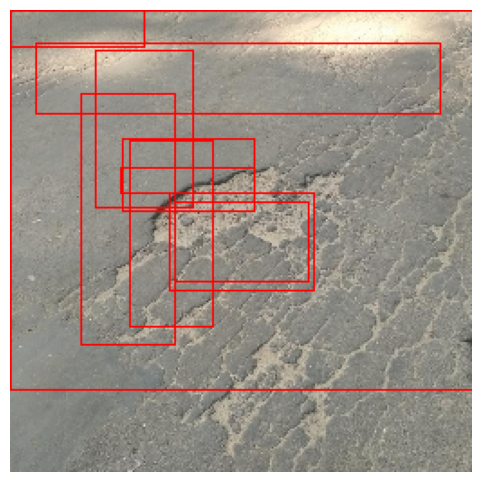

In [ ]:
visualize_top_proposals(
    image_idx=1,
    alg='selective_search',
    top_n=10,
    save=True
)

In [ ]:
import numpy as np

def extract_edge_boxes(image):
    edge_detector = cv2.ximgproc.createStructuredEdgeDetection('./models/model.yml.gz')
    edge_boxes = cv2.ximgproc.createEdgeBoxes()
    edge_boxes.setMaxBoxes(2000)

    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    edges = edge_detector.detectEdges(np.float32(rgb_image) / 255.0)
    orientation = edge_detector.computeOrientation(edges)
    edges_nms = edge_detector.edgesNms(edges, orientation)

    boxes, scores = edge_boxes.getBoundingBoxes(edges_nms, orientation)

    rects = [tuple(box) for box in boxes]

    return rects

In [ ]:
from tqdm import tqdm

def process_images_edge_boxes():
    for image_folder in tqdm(os.listdir(TRAIN_DIR), desc='Processing images'):
        image = cv2.imread(f'{TRAIN_DIR}/{image_folder}/original.jpg')
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        rects = extract_edge_boxes(image)
        rects = [{
            'class': '',
            'xmin': int(rect[0]),
            'ymin': int(rect[1]),
            'xmax': int(rect[2]),
            'ymax': int(rect[3]),
        } for rect in rects]
        
        with open(f'{TRAIN_DIR}/{image_folder}/edge_boxes.json', 'w') as f:
            json.dump(rects, f, indent=4)

In [ ]:
process_images_edge_boxes()

Processing images: 100%|██████████| 532/532 [08:52<00:00,  1.00s/it]


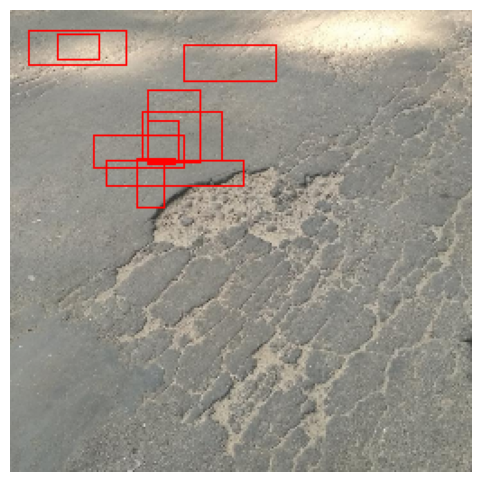

In [ ]:
visualize_top_proposals(
    image_idx=1,
    alg="edge_boxes",
    top_n=10,
    save=False,
)

# Task 3 Model Evaluation

Two metrics produce valuable insights about the algorithms perofrmance in generating areas of interests.
- **Pascal-Recall:** The percentage of ground-truth objects that have at least one proposal overlapping with them at an IoU (Intersection over Union) greater than or equal to a threshold (typically 0.5). It measures how well the proposals cover the actual objects in the dataset.
- **MABO(Mean Average Best Overlap)::**  For each ground-truth object, find the proposal with the highest IoU. MABO is the average of these maximum IoUs over all ground-truth objects. It assesses the localization quality of the proposals.

In [ ]:
def compute_iou(boxA, boxB):
    boxB_converted = {
        'xmin': boxB[0],
        'ymin': boxB[1],
        'xmax': boxB[0] + boxB[2],
        'ymax': boxB[1] + boxB[3]
    }

    xA = max(boxA['xmin'], boxB_converted['xmin'])
    yA = max(boxA['ymin'], boxB_converted['ymin'])
    xB = min(boxA['xmax'], boxB_converted['xmax'])
    yB = min(boxA['ymax'], boxB_converted['ymax'])

    interWidth = max(0, xB - xA + 1)
    interHeight = max(0, yB - yA + 1)
    intersection = interWidth * interHeight

    boxAArea = (boxA['xmax'] - boxA['xmin'] + 1) * (boxA['ymax'] - boxA['ymin'] + 1)
    boxBArea = (boxB_converted['xmax'] - boxB_converted['xmin'] + 1) * (boxB_converted['ymax'] - boxB_converted['ymin'] + 1)

    union = boxAArea + boxBArea - intersection
    return intersection / union

In [ ]:
def evaluate_proposals(annotations_dir, proposals_dir, method_name, num_proposals_list, proposal_suffix, iou_threshold=0.5):
    annotation_files = os.listdir(annotations_dir)
    total_ground_truth_boxes = 0

    num_proposals_list = sorted(num_proposals_list)
    results = {'recalls': [], 'mabo': []}

    for n in num_proposals_list:
        recall_numerator = 0
        mabo_total = 0.0
        total_ground_truth_boxes = 0

        for idx, annotation_file in enumerate(annotation_files):
            xml_path = os.path.join(annotations_dir, annotation_file)
            ground_truth_boxes = parse_annotation(xml_path)
            total_ground_truth_boxes += len(ground_truth_boxes)

            image_id = os.path.splitext(annotation_file)[0]
            proposals_file = os.path.join(proposals_dir, image_id + proposal_suffix)

            if not os.path.exists(proposals_file):
                print(f"{method_name}: Proposals for '{image_id}' not found. Skipping.")
                continue

            proposals = np.load(proposals_file, allow_pickle=True)
            if len(proposals) == 0:
                continue

            proposals_n = proposals[:n]
            matched_gt = 0

            for gt_box in ground_truth_boxes:
                max_iou = 0.0
                for prop in proposals_n:
                    iou = compute_iou(gt_box, prop)
                    if iou > max_iou:
                        max_iou = iou
                mabo_total += max_iou
                if max_iou >= iou_threshold:
                    matched_gt += 1

            recall_numerator += matched_gt

        # Calculate recall and MABO for n proposals
        recall = recall_numerator / total_ground_truth_boxes if total_ground_truth_boxes > 0 else 0
        mabo = mabo_total / total_ground_truth_boxes if total_ground_truth_boxes > 0 else 0

        results['recalls'].append(recall)
        results['mabo'].append(mabo)

        print(f"{method_name} - Proposals: {n}, Recall: {recall:.4f}, MABO: {mabo:.4f}")

    return results

In [ ]:
def plot_metric_vs_proposals(num_proposals_list, metric_ss, metric_eb, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(num_proposals_list, metric_ss, marker='o', label='Selective Search')
    plt.plot(num_proposals_list, metric_eb, marker='s', label='Edge Boxes')
    plt.xlabel('Number of Proposals')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} vs. Number of Proposals')
    plt.legend()
    plt.grid(True)
    plt.xticks(num_proposals_list)
    plt.ylim(0, 1.05)
    plt.show()

In [ ]:
# # Update these paths to match your directory structure
# annotations_directory = './Potholes/annotated-images'
# ss_proposals_directory = './Potholes/ss_proposals'
# eb_proposals_directory = './Potholes/edgeboxes_output'

# # Define proposal suffixes for each method
# ss_proposal_suffix = '_proposals.npy'      # Selective Search proposal files
# eb_proposal_suffix = '_edgeboxes.npy'      # Edge Boxes proposal files

# # Define the number of proposals to evaluate
# num_proposals_list = [1, 2, 4, 8, 19, 50] # , 100, 200, 500, 1000
# iou_threshold = 0.5

# # Evaluate Selective Search
# results_ss = evaluate_proposals(
#     annotations_dir=annotations_directory,
#     proposals_dir=ss_proposals_directory,
#     method_name='Selective Search',
#     num_proposals_list=num_proposals_list,
#     proposal_suffix=ss_proposal_suffix,
#     iou_threshold=iou_threshold
# )

# # Evaluate Edge Boxes
# results_eb = evaluate_proposals(
#     annotations_dir=annotations_directory,
#     proposals_dir=eb_proposals_directory,
#     method_name='Edge Boxes',
#     num_proposals_list=num_proposals_list,
#     proposal_suffix=eb_proposal_suffix,
#     iou_threshold=iou_threshold
# )

# # Plot Pascal-Recall vs. Number of Proposals
# plot_metric_vs_proposals(
#     num_proposals_list=num_proposals_list,
#     metric_ss=results_ss['recalls'],
#     metric_eb=results_eb['recalls'],
#     metric_name='Pascal-Recall'
# )

# # Plot MABO vs. Number of Proposals
# plot_metric_vs_proposals(
#     num_proposals_list=num_proposals_list,
#     metric_ss=results_ss['mabo'],
#     metric_eb=results_eb['mabo'],
#     metric_name='MABO'
# )

Evaluating Selective Search Proposals...


PermissionError: [Errno 13] Permission denied: './Potholes/annotated-images\\test'

In [131]:
import matplotlib.patches as patches
from PIL import Image

def display_ground_truth_and_proposals(idx, alg, top_n=100, save=False):
    image = Image.open(f'{TRAIN_DIR}/img-{idx}/original.jpg')
    # image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)
    
    # Draw ground-truth boxes in blue
    ground_truth_boxes = parse_annotation(f'img-{idx}')
    for ground_truth_box in ground_truth_boxes:
        rect = patches.Rectangle(
            (ground_truth_box['xmin'], ground_truth_box['ymin']),
            ground_truth_box['xmax'] - ground_truth_box['xmin'],
            ground_truth_box['ymax'] - ground_truth_box['ymin'],
            linewidth=2, edgecolor='blue', facecolor='none', label='Ground Truth'
        )
        ax.add_patch(rect)

    proposals = json.load(open(f'{TRAIN_DIR}/img-{idx}/{alg}.json'))
    print(proposals)
    for prop in proposals[:top_n]:
        rect = patches.Rectangle(
            (prop['xmin'], prop['ymin']),
            prop['xmax'] - prop['xmin'],
            prop['ymax'] - prop['ymin'],
            linewidth=1, edgecolor='red', facecolor='none', label='Proposal'
        )
        ax.add_patch(rect)

    # Avoid duplicate labels in legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    plt.title(f'Ground Truth vs. {alg} Proposals')
    plt.axis('off')
    plt.show()

    # Save the visualized image if a save path is provided
    if save:
        fig.savefig(f'{TRAIN_DIR}/ground_truth_vs_{alg}_proposals', bbox_inches='tight')

[{'class': '', 'xmin': 144, 'ymin': 13, 'xmax': 62, 'ymax': 31}, {'class': '', 'xmin': 111, 'ymin': 173, 'xmax': 89, 'ymax': 79}, {'class': '', 'xmin': 132, 'ymin': 56, 'xmax': 59, 'ymax': 26}, {'class': '', 'xmin': 28, 'ymin': 24, 'xmax': 28, 'ymax': 29}, {'class': '', 'xmin': 40, 'ymin': 87, 'xmax': 98, 'ymax': 50}, {'class': '', 'xmin': 150, 'ymin': 101, 'xmax': 42, 'ymax': 17}, {'class': '', 'xmin': 85, 'ymin': 0, 'xmax': 171, 'ymax': 192}, {'class': '', 'xmin': 23, 'ymin': 31, 'xmax': 21, 'ymax': 12}, {'class': '', 'xmin': 0, 'ymin': 82, 'xmax': 29, 'ymax': 42}, {'class': '', 'xmin': 0, 'ymin': 140, 'xmax': 25, 'ymax': 55}, {'class': '', 'xmin': 135, 'ymin': 23, 'xmax': 29, 'ymax': 9}, {'class': '', 'xmin': 0, 'ymin': 91, 'xmax': 94, 'ymax': 64}, {'class': '', 'xmin': 101, 'ymin': 37, 'xmax': 24, 'ymax': 15}, {'class': '', 'xmin': 40, 'ymin': 87, 'xmax': 29, 'ymax': 22}, {'class': '', 'xmin': 41, 'ymin': 192, 'xmax': 123, 'ymax': 64}, {'class': '', 'xmin': 192, 'ymin': 0, 'xmax': 

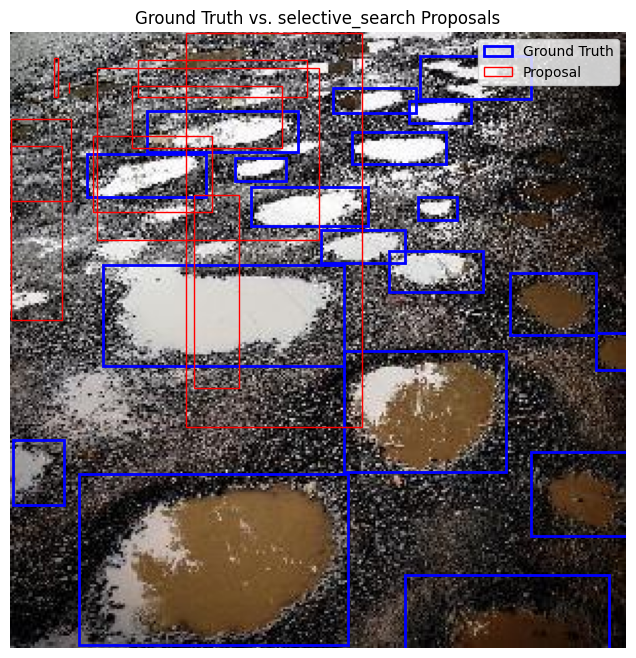

[{'class': '', 'xmin': 45, 'ymin': 93, 'xmax': 88, 'ymax': 41}, {'class': '', 'xmin': 26, 'ymin': 92, 'xmax': 106, 'ymax': 47}, {'class': '', 'xmin': 142, 'ymin': 136, 'xmax': 63, 'ymax': 48}, {'class': '', 'xmin': 43, 'ymin': 78, 'xmax': 90, 'ymax': 61}, {'class': '', 'xmin': 43, 'ymin': 65, 'xmax': 105, 'ymax': 69}, {'class': '', 'xmin': 35, 'ymin': 99, 'xmax': 101, 'ymax': 153}, {'class': '', 'xmin': 43, 'ymin': 94, 'xmax': 90, 'ymax': 52}, {'class': '', 'xmin': 138, 'ymin': 130, 'xmax': 77, 'ymax': 55}, {'class': '', 'xmin': 26, 'ymin': 71, 'xmax': 106, 'ymax': 65}, {'class': '', 'xmin': 34, 'ymin': 188, 'xmax': 102, 'ymax': 63}, {'class': '', 'xmin': 65, 'ymin': 97, 'xmax': 66, 'ymax': 29}, {'class': '', 'xmin': 43, 'ymin': 52, 'xmax': 88, 'ymax': 84}, {'class': '', 'xmin': 36, 'ymin': 79, 'xmax': 120, 'ymax': 57}, {'class': '', 'xmin': 34, 'ymin': 94, 'xmax': 173, 'ymax': 161}, {'class': '', 'xmin': 43, 'ymin': 46, 'xmax': 106, 'ymax': 97}, {'class': '', 'xmin': 43, 'ymin': 84, '

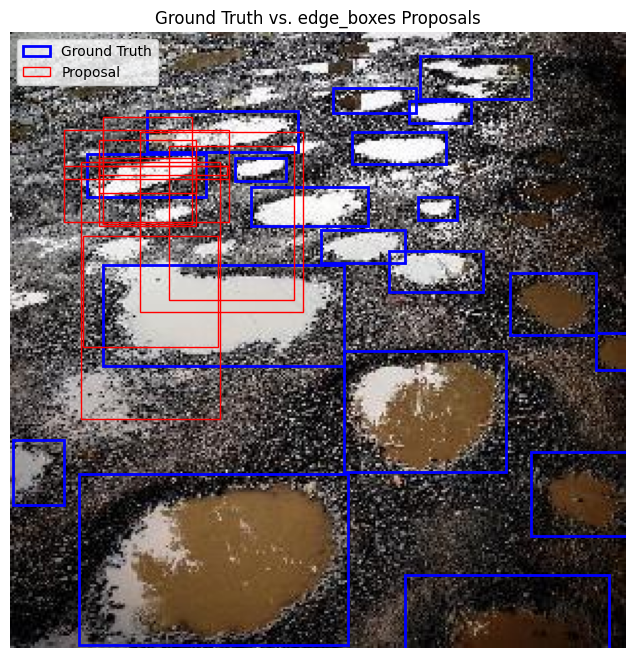

In [ ]:
sample_image_id = 'img-595'
sample_image_path = f'{TRAIN_DIR}/{sample_image_id}/original.jpg' 
sample_annotation_file = f'{TRAIN_DIR}/{sample_image_id}/ground_truth.xml'

display_ground_truth_and_proposals(
    idx=595,
    alg='selective_search',
    top_n=10,
)

display_ground_truth_and_proposals(
    idx=595,
    alg='edge_boxes',
    top_n=10,
)

# Task4. Prepearation for training; Label Assignment:

Analyzes the IoU Threshold and marks as true the

A possible concern could have been that if let´s say three propsal with a high IoU with the ground trough higher than 0.5 are all labelled positive, we would have multiple propsals for each object. This could be a problem in a multiple class setup, where excesive positive proposals for the same object could result in class imbalance. Additionally a high number of overlapping proposals could introduce redundancy,making training less efficient.

On the other hand having multiple proposals covering covering the same object from different angles and positions can provide different training examples. It could serve as a sort of Data-Augmentation. It can also ensure that there is enough training samples for less frequent objects: such as for example a very small pothole.

We will define two methods:

1. **Limiting Positive Proposal per Ground-Truth object**


In [ ]:
def assign_labels_to_proposals(annotations_dir, proposals_dir, output_dir, proposal_suffix, pos_iou_threshold=0.5, neg_iou_threshold=0.1, max_pos_per_gt=5):
    os.makedirs(output_dir, exist_ok=True)

    annotation_files = os.listdir(annotations_dir)

    for annotation_file in annotation_files:
        xml_path = os.path.join(annotations_dir, annotation_file)
        image_id = os.path.splitext(annotation_file)[0]
        proposals_file = os.path.join(proposals_dir, image_id + proposal_suffix)

        ground_truth_boxes = parse_annotation(xml_path)
        proposals = np.load(proposals_file, allow_pickle=True)

        # Initialize counters for each ground-truth box
        gt_counters = {i: 0 for i in range(len(ground_truth_boxes))}
        labeled_proposals = []
        for prop in proposals:
            max_iou = 0
            assigned_label = 'background'  # Default label
            assigned_gt = -1

            for idx, gt_box in enumerate(ground_truth_boxes):
                iou = compute_iou(gt_box, prop)
                if iou > max_iou:
                    max_iou = iou
                    assigned_gt = idx

            if max_iou >= pos_iou_threshold and gt_counters[assigned_gt] < max_pos_per_gt:
                assigned_label = ground_truth_boxes[assigned_gt]['class']
                gt_counters[assigned_gt] += 1
            elif max_iou < neg_iou_threshold:
                assigned_label = 'background'
            else:
                assigned_label = None  # To be ignored

            if assigned_label is not None:
                labeled_proposals.append({
                    'box': prop,
                    'label': assigned_label
                })

        if labeled_proposals:
            output_file = os.path.join(output_dir, image_id + '_labeled_proposals.npy')
            np.save(output_file, labeled_proposals)
            print(f"Labeled proposals saved for '{image_id}' in '{output_dir}'.")
        else:
            print(f"No labeled proposals for '{image_id}' after applying IoU thresholds.")


In [134]:
ss_proposals_dir = './Potholes/ss_proposals'  # Selective Search proposals
eb_proposals_dir = './Potholes/edgeboxes_output'  # Edge Boxes proposals
output_dir_ss = './Potholes/Max_Prop/Labeled_Proposals_SS'  # Output for SS
output_dir_eb = './Potholes/Max_Prop/Labeled_Proposals_EB'  # Output for EB

# Define proposal suffixes
ss_proposal_suffix = '_proposals.npy'
eb_proposal_suffix = '_edgeboxes.npy'

# Assign labels for Selective Search Proposals
print("Assigning labels to Selective Search proposals...")
assign_labels_to_proposals(
    annotations_dir=TRAIN_DIR,
    proposals_dir=ss_proposals_dir,
    output_dir=output_dir_ss,
    proposal_suffix=ss_proposal_suffix,
    pos_iou_threshold=0.7,
    neg_iou_threshold=0.1
)

# Assign labels for Edge Boxes Proposals
print("\nAssigning labels to Edge Boxes proposals...")
assign_labels_to_proposals(
    annotations_dir=TRAIN_DIR,
    proposals_dir=eb_proposals_dir,
    output_dir=output_dir_eb,
    proposal_suffix=eb_proposal_suffix,
    pos_iou_threshold=0.7,
    neg_iou_threshold=0.1,
     max_pos_per_gt=5
)

Assigning labels to Selective Search proposals...


FileNotFoundError: [Errno 2] No such file or directory: './Potholes/annotated-images/train/./Potholes/annotated-images/train\\img-1/data.xml'

In [ ]:
def visualize_labeled_proposals(image_path, labeled_proposals, save_path=None):
    """
    Visualizes labeled proposals on the image.

    Args:
        image_path (str): Path to the image file.
        labeled_proposals (list): List of dictionaries with 'box' and 'label'.
        save_path (str, optional): Path to save the visualization image.
    """
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    for proposal in labeled_proposals:
        box = proposal['box']
        label = proposal['label']
        x, y, w, h = box
        if label == 'background':
            edge_color = 'gray'
            linewidth = 1
        else:
            edge_color = 'red'
            linewidth = 2
        rect = patches.Rectangle((x, y), w, h, linewidth=linewidth, edgecolor=edge_color, facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, label, fontsize=8, color='yellow', bbox=dict(facecolor=edge_color, alpha=0.5))

    plt.title('Labeled Proposals')
    plt.axis('off')
    plt.show()

    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
        print(f"Visualization saved at '{save_path}'.")

In [ ]:
sample_image_id = 'img-595'
image_path = f'{TRAIN_DIR}/{sample_image_id}/original.jpg'
labeled_proposals_file = os.path.join(output_dir_ss, sample_image_id + '_labeled_proposals.npy')

if os.path.exists(labeled_proposals_file):
    labeled_proposals = np.load(labeled_proposals_file, allow_pickle=True)
    visualize_labeled_proposals(image_path, labeled_proposals, save_path='labeled_proposals_ss_img-1.png')
else:
    print(f"Labeled proposals for '{sample_image_id}' not found.")

# Similarly, visualize for Edge Boxes
labeled_proposals_file_eb = os.path.join(output_dir_eb, sample_image_id + '_labeled_proposals.npy')

if os.path.exists(labeled_proposals_file_eb):
    labeled_proposals_eb = np.load(labeled_proposals_file_eb, allow_pickle=True)
    visualize_labeled_proposals(image_path, labeled_proposals_eb, save_path='labeled_proposals_eb_img-1.png')
else:
    print(f"Labeled proposals for '{sample_image_id}' not found.")

2. Applying Non-Maximum Supression (NMS)

In [ ]:
def apply_nms(proposals, nms_threshold=0.3):
    # Convert proposals to the format (x, y, w, h)
    boxes = []
    for prop in proposals:
        if len(prop) != 4:
            print(f"Invalid proposal format: {prop}. Expected (x, y, w, h). Skipping.")
            continue
        x, y, w, h = prop
        boxes.append([x, y, w, h])

    if not boxes:
        return []

    # Create a dummy scores list since NMSBoxes requires scores
    scores = [1.0] * len(boxes)

    # Apply NMS
    indices = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.0, nms_threshold=nms_threshold)

    filtered_proposals = []
    if len(indices) > 0:
        # Handle different formats of 'indices'
        for idx in indices:
            if isinstance(idx, (list, tuple, np.ndarray)):
                index = idx[0]
            else:
                index = idx
            if index < len(proposals):
                filtered_proposals.append(proposals[index])
            else:
                print(f"Index {index} out of bounds for proposals list with length {len(proposals)}.")

    return filtered_proposals

In [ ]:
def assign_labels_to_proposals(annotations_dir, proposals_dir, output_dir, proposal_suffix,
                               pos_iou_threshold=0.5, neg_iou_threshold=0.1, max_pos_per_gt=5, nms_threshold=0.3):
    """
    Assigns labels to proposals based on IoU with ground-truth boxes.
    
    Args:
        annotations_dir (str): Directory containing XML annotation files.
        proposals_dir (str): Directory containing proposal .npy files.
        output_dir (str): Directory to save labeled proposals.
        proposal_suffix (str): Suffix of proposal filenames (e.g., '_proposals.npy' or '_edgeboxes.npy').
        pos_iou_threshold (float): IoU threshold to assign positive labels.
        neg_iou_threshold (float): IoU threshold below which proposals are assigned as background.
        max_pos_per_gt (int): Maximum number of positive proposals per ground-truth object.
        nms_threshold (float): IoU threshold for Non-Maximum Suppression.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    annotation_files = os.listdir(annotations_dir)

    for annotation_file in annotation_files:
        xml_path = os.path.join(annotations_dir, annotation_file)
        image_id = os.path.splitext(annotation_file)[0]
        proposals_file = os.path.join(proposals_dir, image_id + proposal_suffix)

        if not os.path.exists(proposals_file):
            print(f"Proposals for '{image_id}' not found in '{proposals_dir}'. Skipping.")
            continue

        ground_truth_boxes = parse_annotation(xml_path)
        proposals = np.load(proposals_file, allow_pickle=True)

        # Apply NMS to proposals
        proposals = apply_nms(proposals, nms_threshold=nms_threshold)

        # Initialize counters for each ground-truth box
        gt_counters = {i: 0 for i in range(len(ground_truth_boxes))}
        labeled_proposals = []
        for prop in proposals:
            max_iou = 0
            assigned_label = 'background'  # Default label
            assigned_gt = -1

            for idx, gt_box in enumerate(ground_truth_boxes):
                iou = compute_iou(gt_box, prop)
                if iou > max_iou:
                    max_iou = iou
                    assigned_gt = idx

            if max_iou >= pos_iou_threshold and gt_counters[assigned_gt] < max_pos_per_gt:
                assigned_label = ground_truth_boxes[assigned_gt]['class']
                gt_counters[assigned_gt] += 1
            elif max_iou < neg_iou_threshold:
                assigned_label = 'background'
            else:
                assigned_label = None  # To be ignored

            if assigned_label is not None:
                labeled_proposals.append({
                    'box': prop,
                    'label': assigned_label
                })

        if labeled_proposals:
            output_file = os.path.join(output_dir, image_id + '_labeled_proposals.npy')
            np.save(output_file, labeled_proposals)
            print(f"Labeled proposals saved for '{image_id}' in '{output_dir}'.")
        else:
            print(f"No labeled proposals for '{image_id}' after applying IoU thresholds.")

In [ ]:

# Define directories
ss_proposals_dir = './Potholes/ss_proposals'  # Selective Search proposals
eb_proposals_dir = './Potholes/edgeboxes_output'  # Edge Boxes proposals
output_dir_ss = './Potholes/NMS/Labeled_Proposals_SS'  # Output for SS
output_dir_eb = './Potholes/NMS/Labeled_Proposals_EB'  # Output for EB

# Define proposal suffixes
ss_proposal_suffix = '_proposals.npy'
eb_proposal_suffix = '_edgeboxes.npy'

# Assign labels for Selective Search Proposals
print("Assigning labels to Selective Search proposals...")
assign_labels_to_proposals(
    annotations_dir=TRAIN_DIR,
    proposals_dir=ss_proposals_dir,
    output_dir=output_dir_ss,
    proposal_suffix=ss_proposal_suffix,
    pos_iou_threshold=0.5,
    neg_iou_threshold=0.1
)

# Assign labels for Edge Boxes Proposals
print("\nAssigning labels to Edge Boxes proposals...")
assign_labels_to_proposals(
    annotations_dir=TRAIN_DIR,
    proposals_dir=eb_proposals_dir,
    output_dir=output_dir_eb,
    proposal_suffix=eb_proposal_suffix,
    pos_iou_threshold=0.5,
    neg_iou_threshold=0.1,
    max_pos_per_gt=5
)


In [ ]:
# Example visualization for a single image from Selective Search
sample_image_id = 'img-595'  # Replace with an actual image ID
image_path = os.path.join('./Potholes/annotated-images', sample_image_id + '.jpg')
labeled_proposals_file = os.path.join(output_dir_ss, sample_image_id + '_labeled_proposals.npy')
labeled_proposals = np.load(labeled_proposals_file, allow_pickle=True)
visualize_labeled_proposals(image_path, labeled_proposals, save_path='labeled_proposals_ss_img-1.png')

# Similarly, visualize for Edge Boxes
labeled_proposals_file_eb = os.path.join(output_dir_eb, sample_image_id + '_labeled_proposals.npy')
labeled_proposals_eb = np.load(labeled_proposals_file_eb, allow_pickle=True)
visualize_labeled_proposals(image_path, labeled_proposals_eb, save_path='labeled_proposals_eb_img-1.png')

Bare in mind that limiting the number of positive porposals per ground-truth object to 1 and applying NMS is different:

# key differences between the two approaches

| aspect                | limiting proposals per object to 1              | applying non-maximum suppression (nms)                 |
|-----------------------|-------------------------------------------------|--------------------------------------------------------|
| goal                  | selects a single best proposal per object       | eliminates redundant overlapping proposals             |
| diversity             | limited (only one proposal per object)          | higher (multiple perspectives of the same object)      |
| approach              | object-based constraint                         | overlap-based constraint                               |
| typical use case      | small datasets or when overfitting is a concern | large datasets, handling occlusions, and varied scales |
| impact on training    | simplifies training, reduces computation        | increases robustness, more computation                 |
